In [ ]:
pip install pandas
pip isntall tensorflow
pip install numpy

# Machine  Learning Assessment

Input:

•   The input of your model should take a vector with at least the date/time

Output:

•   The output should contain the call volume (count) of 911 calls predicted for this time period.

•	Please  provide a backtesting plot comparing the actual (measured)  call volume vs. predicted call volume for a month and a week.

•   Please  think about measures to judge the quality and certainty of predictions  and provide
them as well.


# NOTES

Data is presented in USA format MM-DD-YYYY, it will be parsed to fit European time notation YYYY- MM-DD.
Data has been simplified and adjusted to a vector input.

In [97]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import logging

# DATA INPUT ("getting data in"  as requested in Rule 2.)
### Vector with at least the date/time

The Dataset of 911 calls:  https://data.seattle.gov/Public- Safety/Seattle-Real-Time-Fire-911-Calls/kzjm-xkqj is sent to DataPrep and edited using BigQuery as suggested, in order to obtain vector with dates only.

In [168]:
#Read data from preprocessed db
def a(data):
    data = pd.read_csv(r"C:\Users\Dell\Niologic\Seattle_Real_Time_Fire_911_Calls-v.csv")
    return 'Data loaded'
a(pd.read_csv(r"C:\Users\Dell\Niologic\Seattle_Real_Time_Fire_911_Calls-v.csv"))


'Data loaded'

In [99]:
# Shows how the db looks like from the beginning in steps of 1000
df = data[1::1000]
df

,Datetime
1,2019-05-22
1001,2005-01-28
2001,2003-11-09
3001,2003-11-14
4001,2003-11-19
...,...
1019001,2016-03-21
1020001,2016-03-24
1021001,2016-03-28
1022001,2016-04-01


# Processing data (scoring) as requested in Rule 2. and 3)

In [100]:
#counts the number of calls per day from database, db is ordered
dgroup=data.groupby('Datetime').size()
dgroup

Datetime
2003-11-07    188
2003-11-08    246
2003-11-09    234
2003-11-10    225
2003-11-11    168
             ... 
2021-10-24      1
2021-11-04      1
2021-12-10      1
2022-01-01      2
2022-01-22      1
Length: 4640, dtype: int64

<AxesSubplot:xlabel='Datetime'>

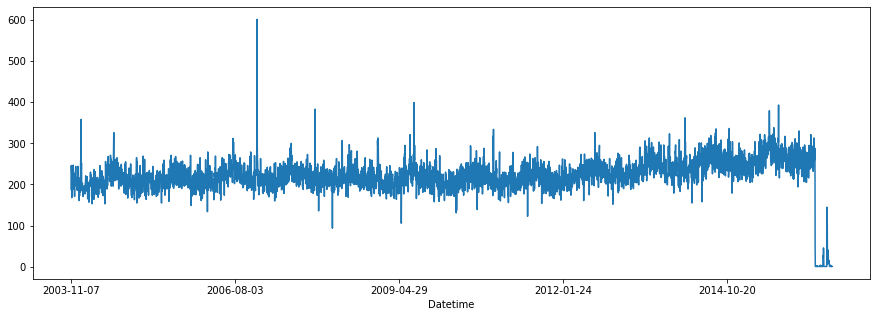

In [101]:
dgroup.plot(figsize=(15,5), kind='line',x=0, y=1)

In [102]:

def df2c(df, window_size=5):
    df2np=df.to_numpy()
    X=[]
    y=[]
    for i in range(len(df2np)-window_size):
        row=[[a] for a in df2np[i:i+window_size]]
        X.append(row)
        label=df2np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)

In [103]:
import convert2np
import numpy as np

In [110]:
WINDOW_SIZE = 5
X1, y1 = df2c(dgroup, WINDOW_SIZE)
X1.shape, y1.shape


((4635, 5, 1), (4635,))

# Training as requested in rule 3

In [116]:
#%%writefile train.py
#splits the set with 70% for training, 20 % for validation and 10% for testing
train_range=round(X1.shape[0]*0.7)
val_range=round(X1.shape[0]*0.2)+train_range
test_range=round(X1.shape[0]*0.1)+val_range


X_train1, y_train1 = X1[:train_range], y1[:train_range]
X_val1, y_val1 = X1[train_range:val_range], y1[train_range:val_range]
X_test1, y_test1 = X1[val_range:test_range], y1[val_range:test_range]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((3244, 5, 1), (3244,), (927, 5, 1), (927,), (464, 5, 1), (464,))

# Model 

In [131]:
#%%writefile modellstm.py

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(32))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_12 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 9         
Total params: 4,625
Trainable params: 4,625
Non-trainable params: 0
_________________________________________________________________


In [145]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.1), metrics=[RootMeanSquaredError()])

In [146]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10
102/102 [==============================] - 3s 8ms/step - loss: 16802.3499 - root_mean_squared_error: 122.9467 - val_loss: 1577.0304 - val_root_mean_squared_error: 39.7118


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


Epoch 2/10
102/102 [==============================] - 0s 3ms/step - loss: 789.4789 - root_mean_squared_error: 27.7425 - val_loss: 1364.7145 - val_root_mean_squared_error: 36.9420


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


Epoch 3/10
102/102 [==============================] - 0s 3ms/step - loss: 698.5623 - root_mean_squared_error: 26.4162 - val_loss: 1500.7782 - val_root_mean_squared_error: 38.7399
Epoch 4/10
102/102 [==============================] - 0s 3ms/step - loss: 631.5347 - root_mean_squared_error: 25.0998 - val_loss: 1618.8853 - val_root_mean_squared_error: 40.2354
Epoch 5/10
102/102 [==============================] - 0s 3ms/step - loss: 666.3534 - root_mean_squared_error: 25.7920 - val_loss: 1269.5415 - val_root_mean_squared_error: 35.6306


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


Epoch 6/10
102/102 [==============================] - 0s 4ms/step - loss: 756.3674 - root_mean_squared_error: 27.4546 - val_loss: 1788.4413 - val_root_mean_squared_error: 42.2900
Epoch 7/10
102/102 [==============================] - 0s 3ms/step - loss: 686.3803 - root_mean_squared_error: 26.1885 - val_loss: 1802.4935 - val_root_mean_squared_error: 42.4558
Epoch 8/10
102/102 [==============================] - 0s 3ms/step - loss: 627.6707 - root_mean_squared_error: 25.0344 - val_loss: 1946.9321 - val_root_mean_squared_error: 44.1241
Epoch 9/10
102/102 [==============================] - 0s 3ms/step - loss: 721.3006 - root_mean_squared_error: 26.8459 - val_loss: 1634.5222 - val_root_mean_squared_error: 40.4292
Epoch 10/10
102/102 [==============================] - 0s 3ms/step - loss: 609.6012 - root_mean_squared_error: 24.6649 - val_loss: 1970.0179 - val_root_mean_squared_error: 44.3849


In [147]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [148]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Prediction':train_predictions, 'Data':y_train1})
train_results

,Prediction,Data
0,220.093719,212
1,220.093719,199
2,220.093719,204
3,220.093719,190
4,220.093719,187
...,...,...
3239,220.093719,251
3240,220.093719,229
3241,220.093719,234
3242,220.093719,241


# Output:

•   The output should contain the call volume (count) of 911 calls predicted for this time period.

•	Please  provide a backtesting plot comparing the actual (measured)  call volume vs. predicted call volume for a month and a week.

•   Please  think about measures to judge the quality and certainty of predictions  and provide
them as well.


# Predicted calls

In [152]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Prediction':val_predictions, 'Data':y_val1})
val_results

,Prediction,Data
0,220.093719,261
1,220.093719,219
2,220.093719,238
3,220.093719,237
4,220.093719,220
...,...,...
922,220.093719,277
923,220.093719,261
924,220.093719,244
925,220.093719,225


# Backtesting plot 

#### Call volume vs. predicted call volume for a month

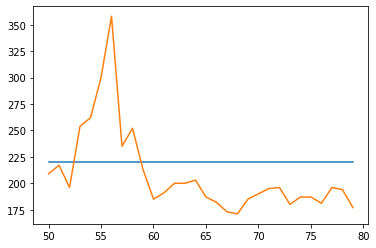

In [158]:
import matplotlib.pyplot as plt
plt.plot(train_results['Prediction'][50:80])
plt.plot(train_results['Data'][50:80])

In [159]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Prediction':val_predictions, 'Data':y_val1})
val_results

,Prediction,Data
0,220.093719,261
1,220.093719,219
2,220.093719,238
3,220.093719,237
4,220.093719,220
...,...,...
922,220.093719,277
923,220.093719,261
924,220.093719,244
925,220.093719,225


#### Call volume vs. predicted call volume for a week.

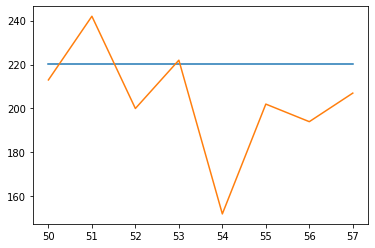

In [157]:
plt.plot(val_results['Prediction'][50:58])
plt.plot(val_results['Data'][50:58])

In [160]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Prediction':test_predictions, 'Data':y_test1})
test_results

,Prediction,Data
0,220.093719,241
1,220.093719,253
2,220.093719,251
3,220.093719,236
4,220.093719,256
...,...,...
459,137.765442,1
460,124.905540,1
461,113.496201,1
462,111.789276,2


# Measures to judge the quality and certainty of predictions 

In order to improve the quality, Outliers can be detected and removed using different techniques for instance the IRQ (Interquartile range technique) by measuring the statistical dispersion of the data values as a measure of overall distribution and removing the values that fall outside the lower and upper bounds in the whisker diagram.

To use one of the folowing methods via the scikitlearn API :
Mean Squared Error (MSE).
Root Mean Squared Error (RMSE).
Mean Absolute Error (MAE)

A QA process process can be carried out by reviewing the code by identifying identifying the baseline best practices for coding.  QA accuracy can be measured using Bias and Variance in order to check over and underfitting of the model by using accuracy and variance measurements. Moreover, if two or more models give similar acccuracy results, Precision and Recall can be used in order to give further insights of the model behavior.